## Food/Diet Recommender System

The objective of this project is to develop a personalized diet recommendation system. This system aims to suggest an optimized diet plan tailored to each individual user's preferences and dietary requirements. The challenge at hand is approached as an unsupervised learning problem. In the context of this project, the system will utilize unsupervised learning techniques to cluster users based on their dietary preferences and nutritional needs. By analyzing the similarities and differences among users' dietary profiles, the system can generate personalized diet plans that align closely with each user's goals and requirements.

**Web Application:** [https://diet-recommender-system.streamlit.app/](https://diet-recommender-system.streamlit.app/)

#### Group04

**Tutorial section: TT5L**

| | Student ID     | Student Name                |
|--:|:-------------|:---------------------------:|
| 1 | 1201103207   | Melody Koh Si Jie           | 
| 2 | 1211103427   | Law Chin Keat               |
| 3 | 1211102976   | Lee Le Xuan                 | 
| 4 | 1211200755   | Wendy Tan Wei Wei           | 

## 1.0 Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, precision_recall_curve

## 2.0 Exploring the data

We will start by loading the datasets.

In [2]:
df = pd.read_csv('data/RAW_recipes.csv')
df.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231637 entries, 0 to 231636
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   name            231636 non-null  object
 1   id              231637 non-null  int64 
 2   minutes         231637 non-null  int64 
 3   contributor_id  231637 non-null  int64 
 4   submitted       231637 non-null  object
 5   tags            231637 non-null  object
 6   nutrition       231637 non-null  object
 7   n_steps         231637 non-null  int64 
 8   steps           231637 non-null  object
 9   description     226658 non-null  object
 10  ingredients     231637 non-null  object
 11  n_ingredients   231637 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 21.2+ MB


In [4]:
df.dtypes

name              object
id                 int64
minutes            int64
contributor_id     int64
submitted         object
tags              object
nutrition         object
n_steps            int64
steps             object
description       object
ingredients       object
n_ingredients      int64
dtype: object

In [5]:
df.shape

(231637, 12)

In [6]:
df.describe()

,id,minutes,contributor_id,n_steps,n_ingredients
count,231637.000000,2.316370e+05,2.316370e+05,231637.000000,231637.000000
mean,222014.708984,9.398546e+03,5.534885e+06,9.765499,9.051153
std,141206.635626,4.461963e+06,9.979141e+07,5.995128,3.734796
min,38.000000,0.000000e+00,2.700000e+01,0.000000,1.000000
25%,99944.000000,2.000000e+01,5.690500e+04,6.000000,6.000000
50%,207249.000000,4.000000e+01,1.736140e+05,9.000000,9.000000
75%,333816.000000,6.500000e+01,3.982750e+05,12.000000,11.000000
max,537716.000000,2.147484e+09,2.002290e+09,145.000000,43.000000


## 3.0 Data Preprocessing

### 3.1 Handling Missing Values

Next, we will need to handle the missing values in the dataframe.

In [7]:
df.isnull().sum().sum()

4980

In [8]:
(df.isnull().sum()/(len(df)))*100

name              0.000432
id                0.000000
minutes           0.000000
contributor_id    0.000000
submitted         0.000000
tags              0.000000
nutrition         0.000000
n_steps           0.000000
steps             0.000000
description       2.149484
ingredients       0.000000
n_ingredients     0.000000
dtype: float64

There are a total of 4980 rows of missing data found, it seems to be a lot, but 4980/231637 = 0.02 * 100 which is only 2.15%. Now let's try to look at the missing value and analyse them

In [9]:
df.isnull().sum()

name                 1
id                   0
minutes              0
contributor_id       0
submitted            0
tags                 0
nutrition            0
n_steps              0
steps                0
description       4979
ingredients          0
n_ingredients        0
dtype: int64

We can observe that `name` column has only one row of missing data and `description` column has 4979 rows of missing values. 

In [10]:
# filter on column name which row is having null value
name_null = df['name'].isnull()
df[name_null]

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
721,NaN,368257,10,779451,2009-04-27,"['15-minutes-or-less', 'time-to-make', 'course...","[1596.2, 249.0, 155.0, 0.0, 2.0, 112.0, 14.0]",6,"['in a bowl , combine ingredients except for o...",-------------,"['lemon', 'honey', 'horseradish mustard', 'gar...",10


We can noticed that row 721 contains the missing value under `name` column, but based on the ingredients and steps, we know that it is a salad dressing, thus we fill in the value manually.

In [11]:
df.fillna({'name': 'salad dressing'}, inplace=True)
df.loc[721]

name                                                 salad dressing
id                                                           368257
minutes                                                          10
contributor_id                                               779451
submitted                                                2009-04-27
tags              ['15-minutes-or-less', 'time-to-make', 'course...
nutrition             [1596.2, 249.0, 155.0, 0.0, 2.0, 112.0, 14.0]
n_steps                                                           6
steps             ['in a bowl , combine ingredients except for o...
description                                           -------------
ingredients       ['lemon', 'honey', 'horseradish mustard', 'gar...
n_ingredients                                                    10
Name: 721, dtype: object

Next, we need to address the column with the highest number of missing values, `description`. Taking into account the description of `description` column provided by Kaggle, we know that column `description` is just the user-provided description of the recipe that are not essential for our model building, thus we can simply drop it.

In [12]:
df.drop(['description'], axis=1, inplace=True)

In [13]:
# every missing values is now handled successfully
df.isnull().sum()

name              0
id                0
minutes           0
contributor_id    0
submitted         0
tags              0
nutrition         0
n_steps           0
steps             0
ingredients       0
n_ingredients     0
dtype: int64

### 3.2 Handling Duplicated values

Following on, we will check if there is any duplicated values found in the dataframe.

In [14]:
duplicate_data = df.duplicated()
df[duplicate_data]

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,ingredients,n_ingredients


We can observe that there is no duplicated data found, which is great.

## 4.0 Exploratory Data Analysis (EDA)

### 4.1 Feature Engineering

We will manually engineer some additional features out of the original dataset, the `nutrition` column provides information such as calories, total fat, sugar, sodium, protein and saturated fat which could be beneficial for our model. We will split this list into separate columns for each nutrient.

In [15]:
# split the 'nutrition' column into separate columns for each nutrient
df[['calories','total fat','sugar','sodium','protein','saturated fat','carbohydrates']] = df.nutrition.str.split(",",expand=True) 

In [16]:
# Remove '[' from 'calories' values and ']' from 'carbohydrates (PDV)' values
df['calories'] = df['calories'].apply(lambda x: x.replace('[',''))
df['carbohydrates'] = df['carbohydrates'].apply(lambda x: x.replace(']',''))

In [17]:
# convert columns from object to float datatype
df[['calories','total fat','sugar','sodium','protein','saturated fat','carbohydrates']] = df[['calories','total fat','sugar','sodium','protein','saturated fat','carbohydrates']].astype('float')
df.dtypes

name               object
id                  int64
minutes             int64
contributor_id      int64
submitted          object
tags               object
nutrition          object
n_steps             int64
steps              object
ingredients        object
n_ingredients       int64
calories          float64
total fat         float64
sugar             float64
sodium            float64
protein           float64
saturated fat     float64
carbohydrates     float64
dtype: object

In [18]:
df.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,ingredients,n_ingredients,calories,total fat,sugar,sodium,protein,saturated fat,carbohydrates
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...","['winter squash', 'mexican seasoning', 'mixed ...",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...","['prepared pizza crust', 'sausage patty', 'egg...",6,173.4,18.0,0.0,17.0,22.0,35.0,1.0
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...","['ground beef', 'yellow onions', 'diced tomato...",13,269.8,22.0,32.0,48.0,39.0,27.0,5.0
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"['spreadable cheese with garlic and herbs', 'n...",11,368.1,17.0,10.0,2.0,14.0,8.0,20.0
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,352.9,1.0,337.0,23.0,3.0,0.0,28.0


Notice that 7 extra columns are added into the dataset, they are extracted from the `nutrition` column.

#### Categorical column

Now that we have extracted out the values for our `nutrition` column, we can safely dropped this column, but before that, we introduce a new column called `food types`. This categorize the food items into various categories, including Healthy, Vegan, Non-Vegan, Vegan dessert as well as Non-Vegan dessert. A vegan dessert does not contain any animal products like eggs, whereas a non-vegan dessert does.

In [19]:
# add new column named as 'food types'
df['food types'] = np.nan
df['food types'] = df['food types'].astype('str')

In [20]:
# categorize food into Vegan if it does not contain eggs, and Non-Vegan if it contain eggs
for i in df['ingredients'].index:
    if('eggs' not in df.loc[i, 'ingredients']):
        if('ice-cream' in df.loc[i, 'ingredients'] or 'chocolate' in df.loc[i, 'ingredients'] or 'cookies' in df.loc[i, 'ingredients']):
            df.loc[i, 'food types']='Vegan dessert'
    elif('eggs' in df.loc[i, 'ingredients']):
        if('ice-cream' in df.loc[i, 'ingredients'] or 'chocolate' in df.loc[i, 'ingredients'] or 'cookies' in df.loc[i, 'ingredients']):
            df.loc[i, 'food types']='Non-Vegan dessert'

In [21]:
# categorize food into healthy if it is between 20 to 300 calories
for i in df.index:
    if(df.loc[i, 'food types']!='Vegan dessert' and df.loc[i, 'food types']!='Non-Vegan dessert' and 20<df.loc[i, 'calories']<300):
        df.loc[i, 'food types']='Healthy'

In [22]:
# categorize food into Non-Vegan if it contains chicken, eggs, ham and pepperoni
for i in df.index:
    if(df.loc[i, 'food types']!='Vegan dessert' and df.loc[i, 'food types']!='Non-Vegan dessert' and df.loc[i, 'food types']!='Healthy'):
        if('chicken' in df.loc[i, 'ingredients'] or 'eggs' in df.loc[i, 'ingredients'] or'ham' in df.loc[i, 'ingredients'] or 'pepperoni' in df.loc[i, 'ingredients'] ):
            df.loc[i, 'food types']='Non-Vegan'

In [23]:
# categorize food into vegan if it does not contain any of the food types mentioned above
for i in df.index:
    if(df.loc[i, 'food types']!='Vegan dessert' and df.loc[i, 'food types']!='Non-Vegan dessert' and df.loc[i, 'food types']!='Healthy' and df.loc[i, 'food types']!='Non-Vegan'):
        df.loc[i, 'food types']='Vegan'

In [24]:
df['food types'].value_counts()

food types
Healthy              100579
Vegan                 70416
Non-Vegan             45948
Vegan dessert          9532
Non-Vegan dessert      5162
Name: count, dtype: int64

We can observe that it creates 5 distinct unique food types value.

### 4.2 One-Hot Encoding

Next, we will perform one hot encoding for each of the unique values in food type.

In [25]:
# one-hot encoding for food types
types = pd.get_dummies(df['food types'])

In [26]:
df = pd.concat([df, types], axis=1)
df.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,ingredients,...,sodium,protein,saturated fat,carbohydrates,food types,Healthy,Non-Vegan,Non-Vegan dessert,Vegan,Vegan dessert
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...","['winter squash', 'mexican seasoning', 'mixed ...",...,0.0,2.0,0.0,4.0,Healthy,True,False,False,False,False
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...","['prepared pizza crust', 'sausage patty', 'egg...",...,17.0,22.0,35.0,1.0,Healthy,True,False,False,False,False
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...","['ground beef', 'yellow onions', 'diced tomato...",...,48.0,39.0,27.0,5.0,Healthy,True,False,False,False,False
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"['spreadable cheese with garlic and herbs', 'n...",...,2.0,14.0,8.0,20.0,Vegan,False,False,False,True,False
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,"['tomato juice', 'apple cider vinegar', 'sugar...",...,23.0,3.0,0.0,28.0,Vegan,False,False,False,True,False


We can observe that it creates 5 new columns for each of the category in `food type` column.

### 4.3 Drop unnecessary column

Before this we have dropped the column `description`, lets analyse on other columns and see if we could drop any other unnecessary column for our model building later.

In [27]:
df.columns

Index(['name', 'id', 'minutes', 'contributor_id', 'submitted', 'tags',
       'nutrition', 'n_steps', 'steps', 'ingredients', 'n_ingredients',
       'calories', 'total fat', 'sugar', 'sodium', 'protein', 'saturated fat',
       'carbohydrates', 'food types', 'Healthy', 'Non-Vegan',
       'Non-Vegan dessert', 'Vegan', 'Vegan dessert'],
      dtype='object')

From the observation, we could drop the following columns:
1. `contributor_id`, as this column is simply just the user id who submitted the recipe which could not provide any meaningful data for our model building
2. `submitted`, this column indicates the date recipe was submitted which is also unnecessary undoubtedly
3. `nutrition`, we have extracted out the features before this, so we can safely dropped this column.
4. `id`, as this column is simply the unique id values for each of the food

In [28]:
df.drop(['id', 'contributor_id', 'submitted', 'nutrition'], axis=1, inplace=True)
df.head()

,name,minutes,tags,n_steps,steps,ingredients,n_ingredients,calories,total fat,sugar,sodium,protein,saturated fat,carbohydrates,food types,Healthy,Non-Vegan,Non-Vegan dessert,Vegan,Vegan dessert
0,arriba baked winter squash mexican style,55,"['60-minutes-or-less', 'time-to-make', 'course...",11,"['make a choice and proceed with recipe', 'dep...","['winter squash', 'mexican seasoning', 'mixed ...",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0,Healthy,True,False,False,False,False
1,a bit different breakfast pizza,30,"['30-minutes-or-less', 'time-to-make', 'course...",9,"['preheat oven to 425 degrees f', 'press dough...","['prepared pizza crust', 'sausage patty', 'egg...",6,173.4,18.0,0.0,17.0,22.0,35.0,1.0,Healthy,True,False,False,False,False
2,all in the kitchen chili,130,"['time-to-make', 'course', 'preparation', 'mai...",6,"['brown ground beef in large pot', 'add choppe...","['ground beef', 'yellow onions', 'diced tomato...",13,269.8,22.0,32.0,48.0,39.0,27.0,5.0,Healthy,True,False,False,False,False
3,alouette potatoes,45,"['60-minutes-or-less', 'time-to-make', 'course...",11,['place potatoes in a large pot of lightly sal...,"['spreadable cheese with garlic and herbs', 'n...",11,368.1,17.0,10.0,2.0,14.0,8.0,20.0,Vegan,False,False,False,True,False
4,amish tomato ketchup for canning,190,"['weeknight', 'time-to-make', 'course', 'main-...",5,['mix all ingredients& boil for 2 1 / 2 hours ...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,352.9,1.0,337.0,23.0,3.0,0.0,28.0,Vegan,False,False,False,True,False


## 5.0 Data Visualization

### 5.1 Pearson Correlation Heatmap

Next, we would plot a quick correlational analysis to examine the relationship between the numerical attributes by utilizing a seaborn heatmap.

In [29]:
cor = df.iloc[:, 6:13].corr()
display(cor) 

,n_ingredients,calories,total fat,sugar,sodium,protein,saturated fat
n_ingredients,1.000000,0.061429,0.078717,-0.003078,0.037065,0.157753,0.060340
calories,0.061429,1.000000,0.600259,0.864306,0.170535,0.486858,0.548207
total fat,0.078717,0.600259,1.000000,0.164644,0.155745,0.509336,0.870711
sugar,-0.003078,0.864306,0.164644,1.000000,0.084418,0.186464,0.166705
sodium,0.037065,0.170535,0.155745,0.084418,1.000000,0.225052,0.144746
protein,0.157753,0.486858,0.509336,0.186464,0.225052,1.000000,0.491322
saturated fat,0.060340,0.548207,0.870711,0.166705,0.144746,0.491322,1.000000


**Causal question**: Will a reduction in the number of ingredients reduce the calories of a recipe?

The idea is to find out if meals with fewer ingredients typically have fewer calories, which could be useful when designing diet plans for calorie restriction or weight management. We can determine the answer by examining the correlation between `n_ingredients` and `calories`.

<Axes: >

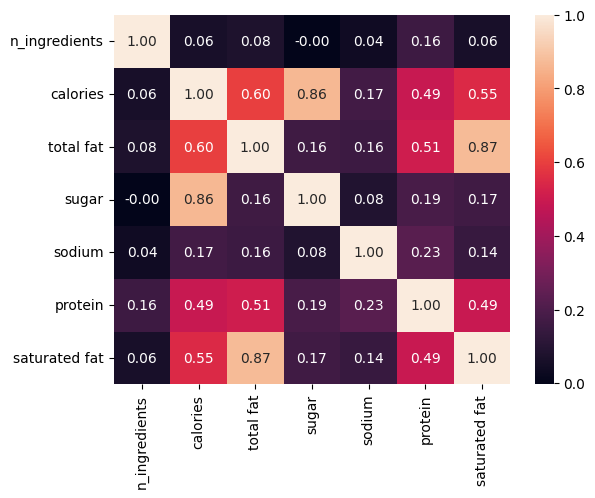

In [30]:
# plot correlation heatmap
sns.heatmap(cor, annot=True, fmt=".2f")

From the heatmap, we observe the following key correlations:
1. Saturated fat and total fat exhibit the highest correlation, with a coefficient of 0.87. This indicates a strong linear relationship between them.
2. There is a low correlation between the number of ingredients and calories, with a coefficient of 0.06. Instead of `n_ingredients`, the amount of sugar seems to affect more, which could be further proven by its positive correlation of 0.86, observed between sugar and calories. This suggests a significant linear relationship, where higher sugar content is closely associated with an increase in calorie count.

Following that, we would define the functions for visualization later on.

In [31]:
#Boxplot
def boxplot(variable, axes, color):
    sns.boxplot(y=variable, data=df, ax=axes, color=color)
    axes.set_title(f'Distribution of {variable}')

#KDE Plot
def kdeplot(variable, color, ax):
    ax.set_title(f'Distribution of {variable}')
    if variable in ['calories', 'total fat', 'sugar', 'sodium', 'protein', 'saturated fat', 'carbohydrates']:
        sns.kdeplot(np.log(df[variable][df[variable] > 0]), fill=True, color=color, ax=ax)
    else:
        sns.kdeplot(df[variable], fill=True, color=color, ax=ax)

#scatterplot
def scatterplot(x, y, ax):
    sns.scatterplot(x=df[x], y=df[y], ax=ax, hue=df['food types']).set(title=f'{x} vs {y}')

### 5.2 Univariate Analysis

**Descriptive Question**: What are the average calories, total fat, sugar, sodium, protein, saturated fat, and carbohydrates per serving across all recipes?

This question intends to investigate the mean values of all the listed nutrients in the recipes in order to gain a comprehensive understanding of their overall nutritional profiles.

In [32]:
nutrition_columns = ['calories', 'total fat', 'sugar', 'sodium', 'protein', 'saturated fat', 'carbohydrates']
average_values = df[nutrition_columns].mean()

# Display the average values
print(average_values)

calories         473.942425
total fat         36.080700
sugar             84.296865
sodium            30.147485
protein           34.681860
saturated fat     45.589150
carbohydrates     15.560403
dtype: float64


The average nutritional values per serving across all recipes are as follows: 473.94 calories, 36.08 grams of total fat, 84.30 grams of sugar, 30.15 milligrams of sodium, 34.68 grams of protein, 45.59 grams of saturated fat, and 15.56 grams of carbohydrates.

Next, we could visualize our numerical attributes with a KDE Plot to understand the data distribution for each nutrients.

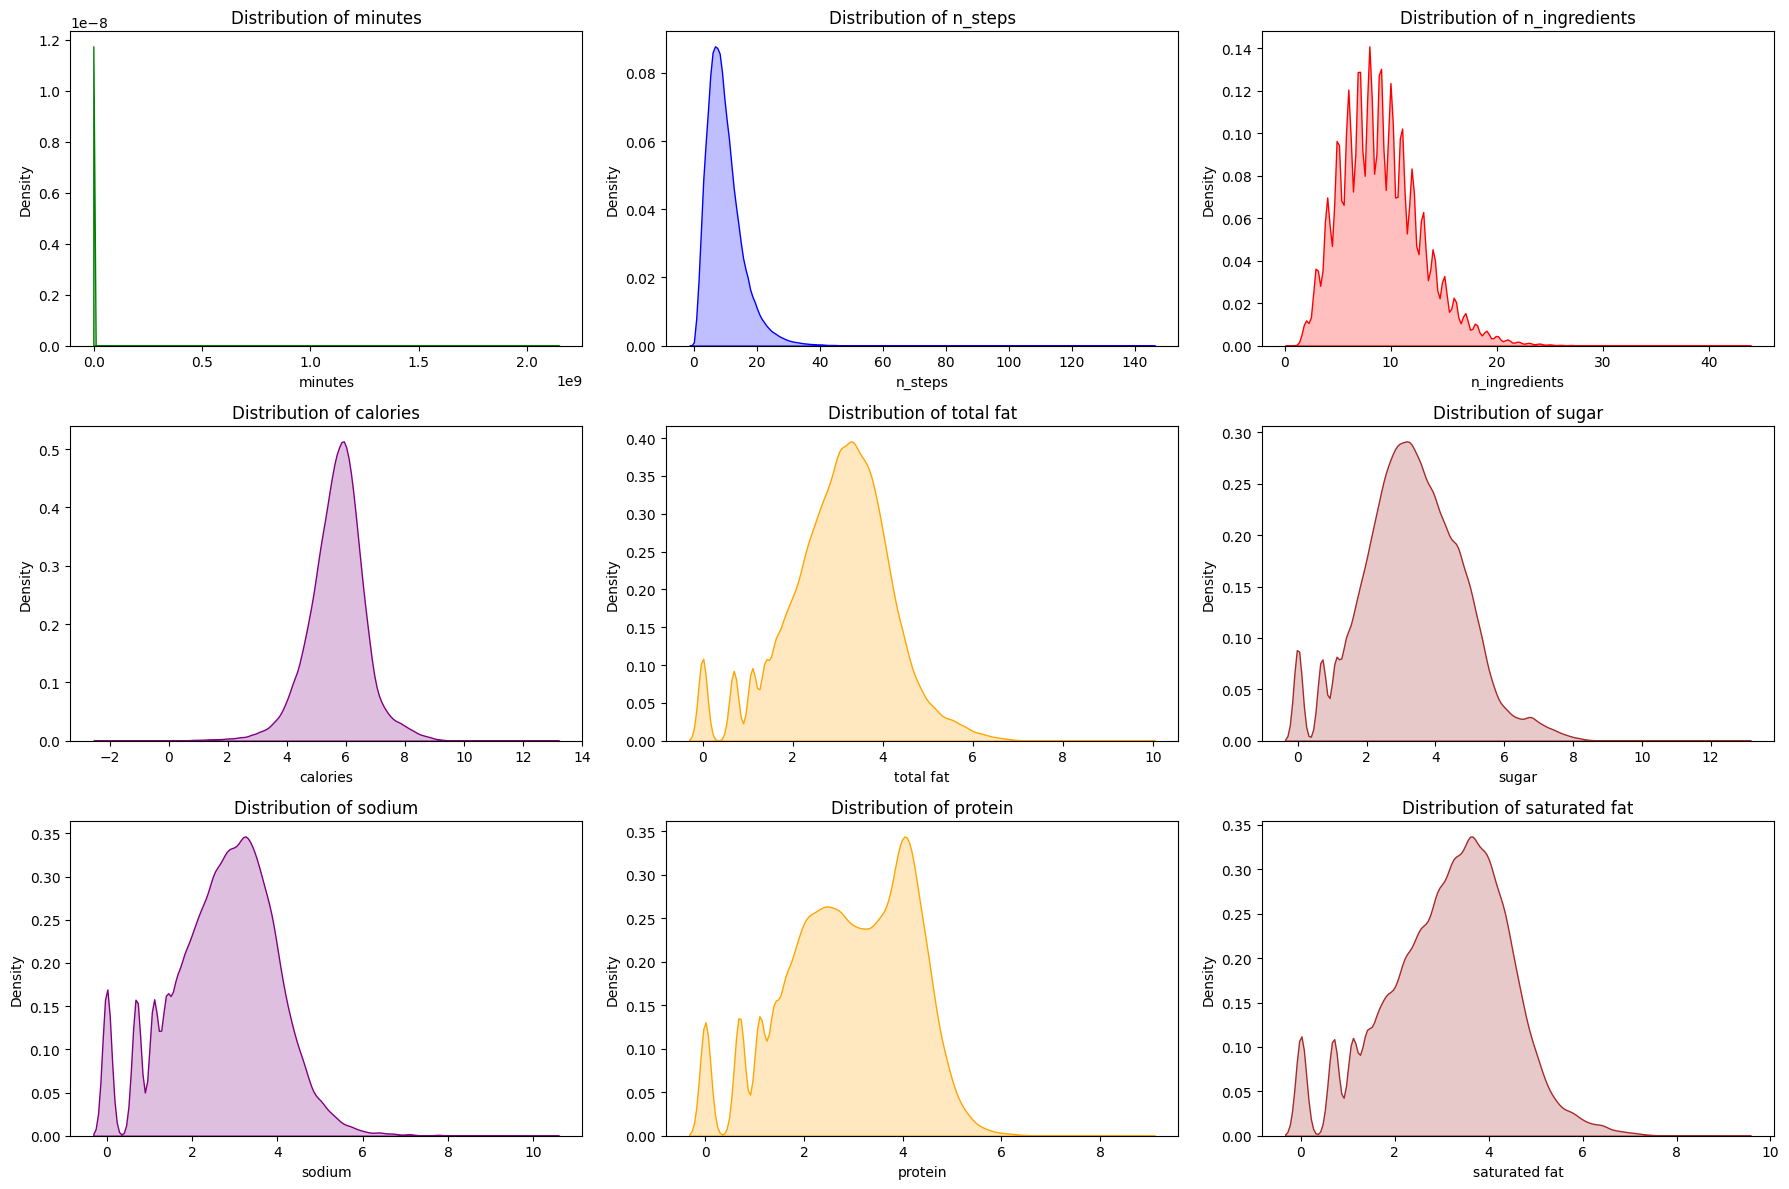

In [33]:
# KDE Plot Visualizations
fig, ax = plt.subplots(3, 3, figsize=(18, 12))
ax = ax.flatten()

variables = df.select_dtypes(include=['int64', 'float64']).columns

# Colors for each plot
colors = ['green', 'blue', 'red', 'purple', 'orange', 'brown', 'purple', 'orange', 'brown']

# Loop through variables and axes to create the KDE plots
for i, (variable, color) in enumerate(zip(variables, colors)):
    kdeplot(variable, color, ax[i])

plt.tight_layout()
plt.show()

From the visualizations above, we could observe that:
1. calories, total fat, sugar, sodium and saturated fat exhibits a gaussian(normal) distribution.
2. n_steps and n_ingredients are right skewed.

**Descriptive Question**: How many distinct food categories are represented in the recipes

A pie chart is a good graphical representation to display the unique values in `food types` column.

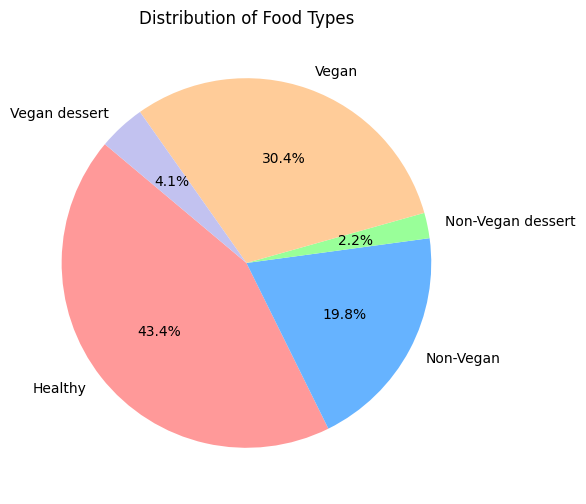

In [34]:
totals = types.sum()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(totals, labels=totals.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0'])
plt.title('Distribution of Food Types')
plt.show()

As we can observe, the majority of the foods are healthy, making up 43.4% of the total. Following this, vegan foods are the second most common, accounting for approximately 30.4%, followed by 19.8% for Non-Vegan category and 4.1% of Vegan dessert. Non-Vegan dessert takes up 2.2% of the total, indicating the least common category.

### 5.3 Removing Outliers

Before conducting bivariate analysis, we would have to drop the outliers found in the dataset. We would first plot a boxplot visualization to analyze the number of outliers found in the numerical columns.

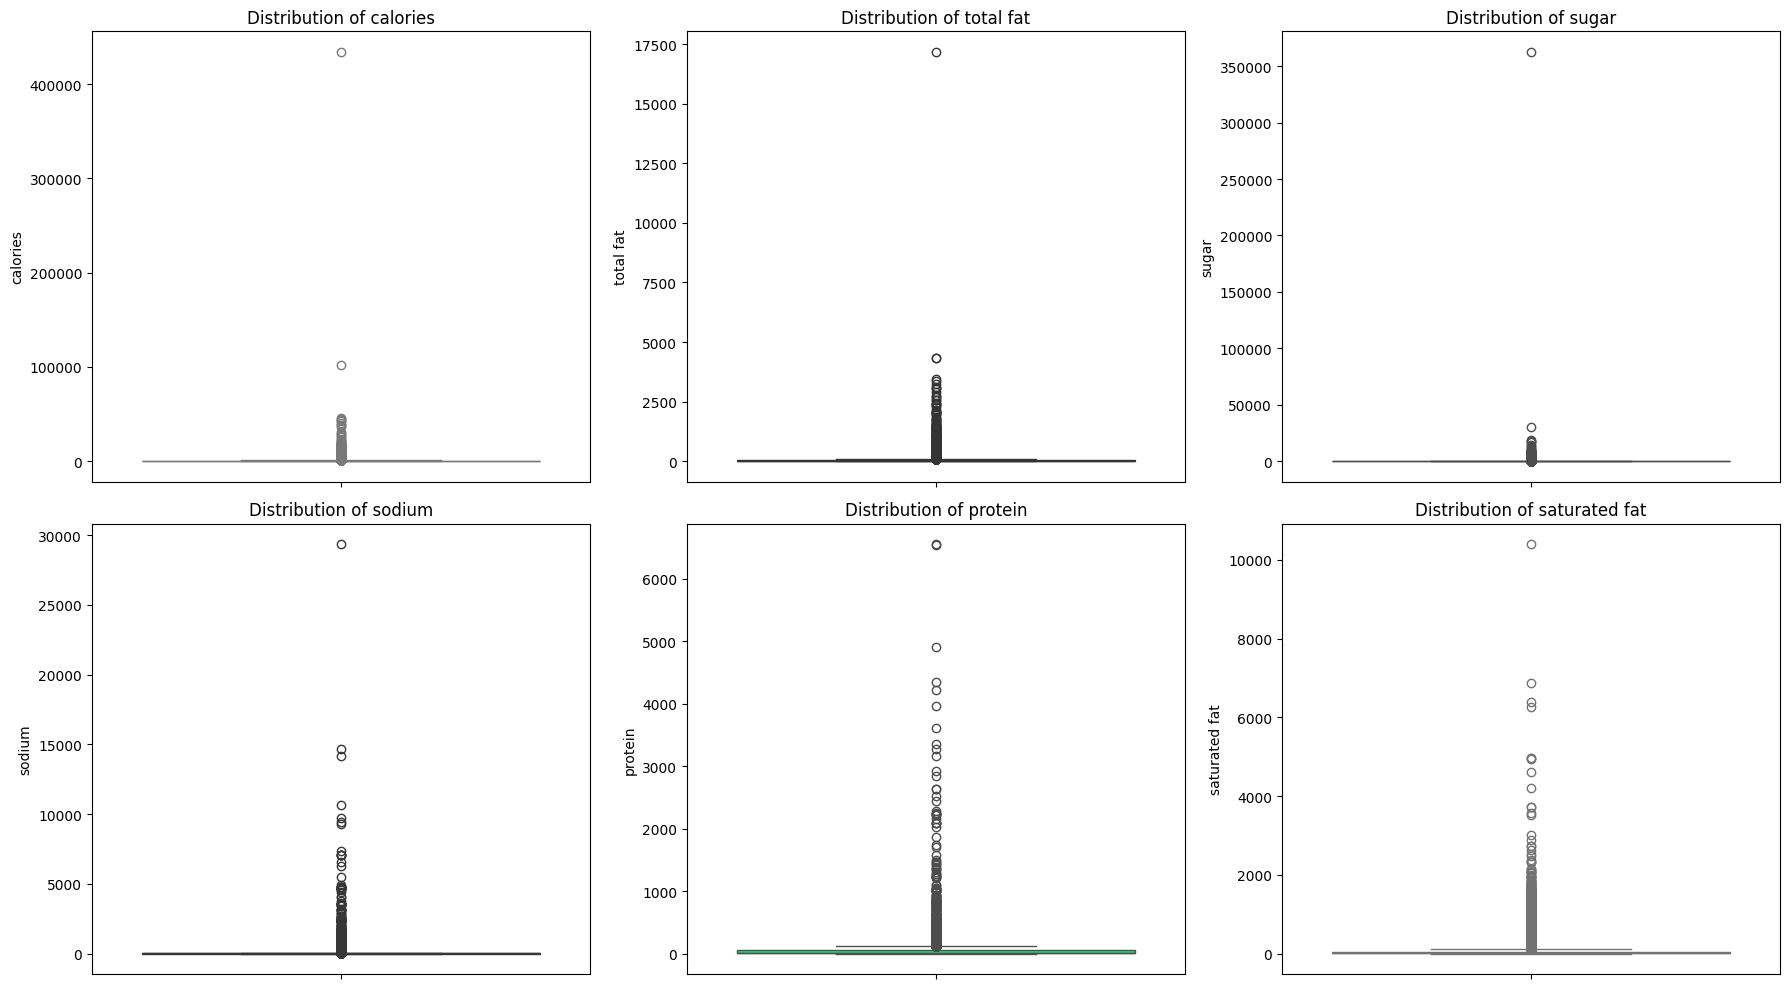

In [35]:
# BoxPlot Visualizations
fig, ax = plt.subplots(2, 3, figsize=(18, 10))
ax = ax.flatten()

variables = df.iloc[:, 7:13].columns

colors = ['palegreen', 'forestgreen', 'limegreen', 'seagreen', 'springgreen', 'aquamarine']

# Loop through variables and axes to create the KDE plots
for i, (variable, color) in enumerate(zip(variables, colors)):
    boxplot(variable, ax[i], color)

plt.tight_layout()
plt.show()

As we observe, there are quite a number of outliers found in the dataset. It is necessary to remove them as they would affect our model performance. There are many methods to deal with outliers, such as the Z-score method or the IQR method. In this case, we will drop the rows that are out of the range for the interquartile range (IQR) method. We define the lower bound as `Q1 - 1.5*IQR` and the upper bound as `Q3 + 1.5*IQR`. Any data points lying outside this range are considered outliers and will be removed from the dataset.

In [36]:
# drop the rows that are out of the range for the IQR method
cols = ['calories', 'total fat', 'sugar', 'sodium', 'protein', 'saturated fat', 'carbohydrates']
for col in cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    lower_tail = q1 - 1.5 * iqr
    upper_tail = q3 + 1.5 * iqr
    df = df[(df[col] >= lower_tail) & (df[col] <= upper_tail)]

### 5.4 Bivariate Analysis

Next, we will conduct a bivariate analysis to explore the correlation between two numerical attributes. We'll plot the four pairs with the highest correlation, as indicated by the heatmap generated earlier.

**Exploratory Question**: What is the relationship between saturated fat and total fat in the recipes?

The goal of this question is to examine the relationship between the recipes' total fat content and saturated fat content. Having a better understanding of this relationship can aid in developing recommendations that reduce the consumption of unhealthy fats while maintaining the nutritional value and appeal of the meals. 

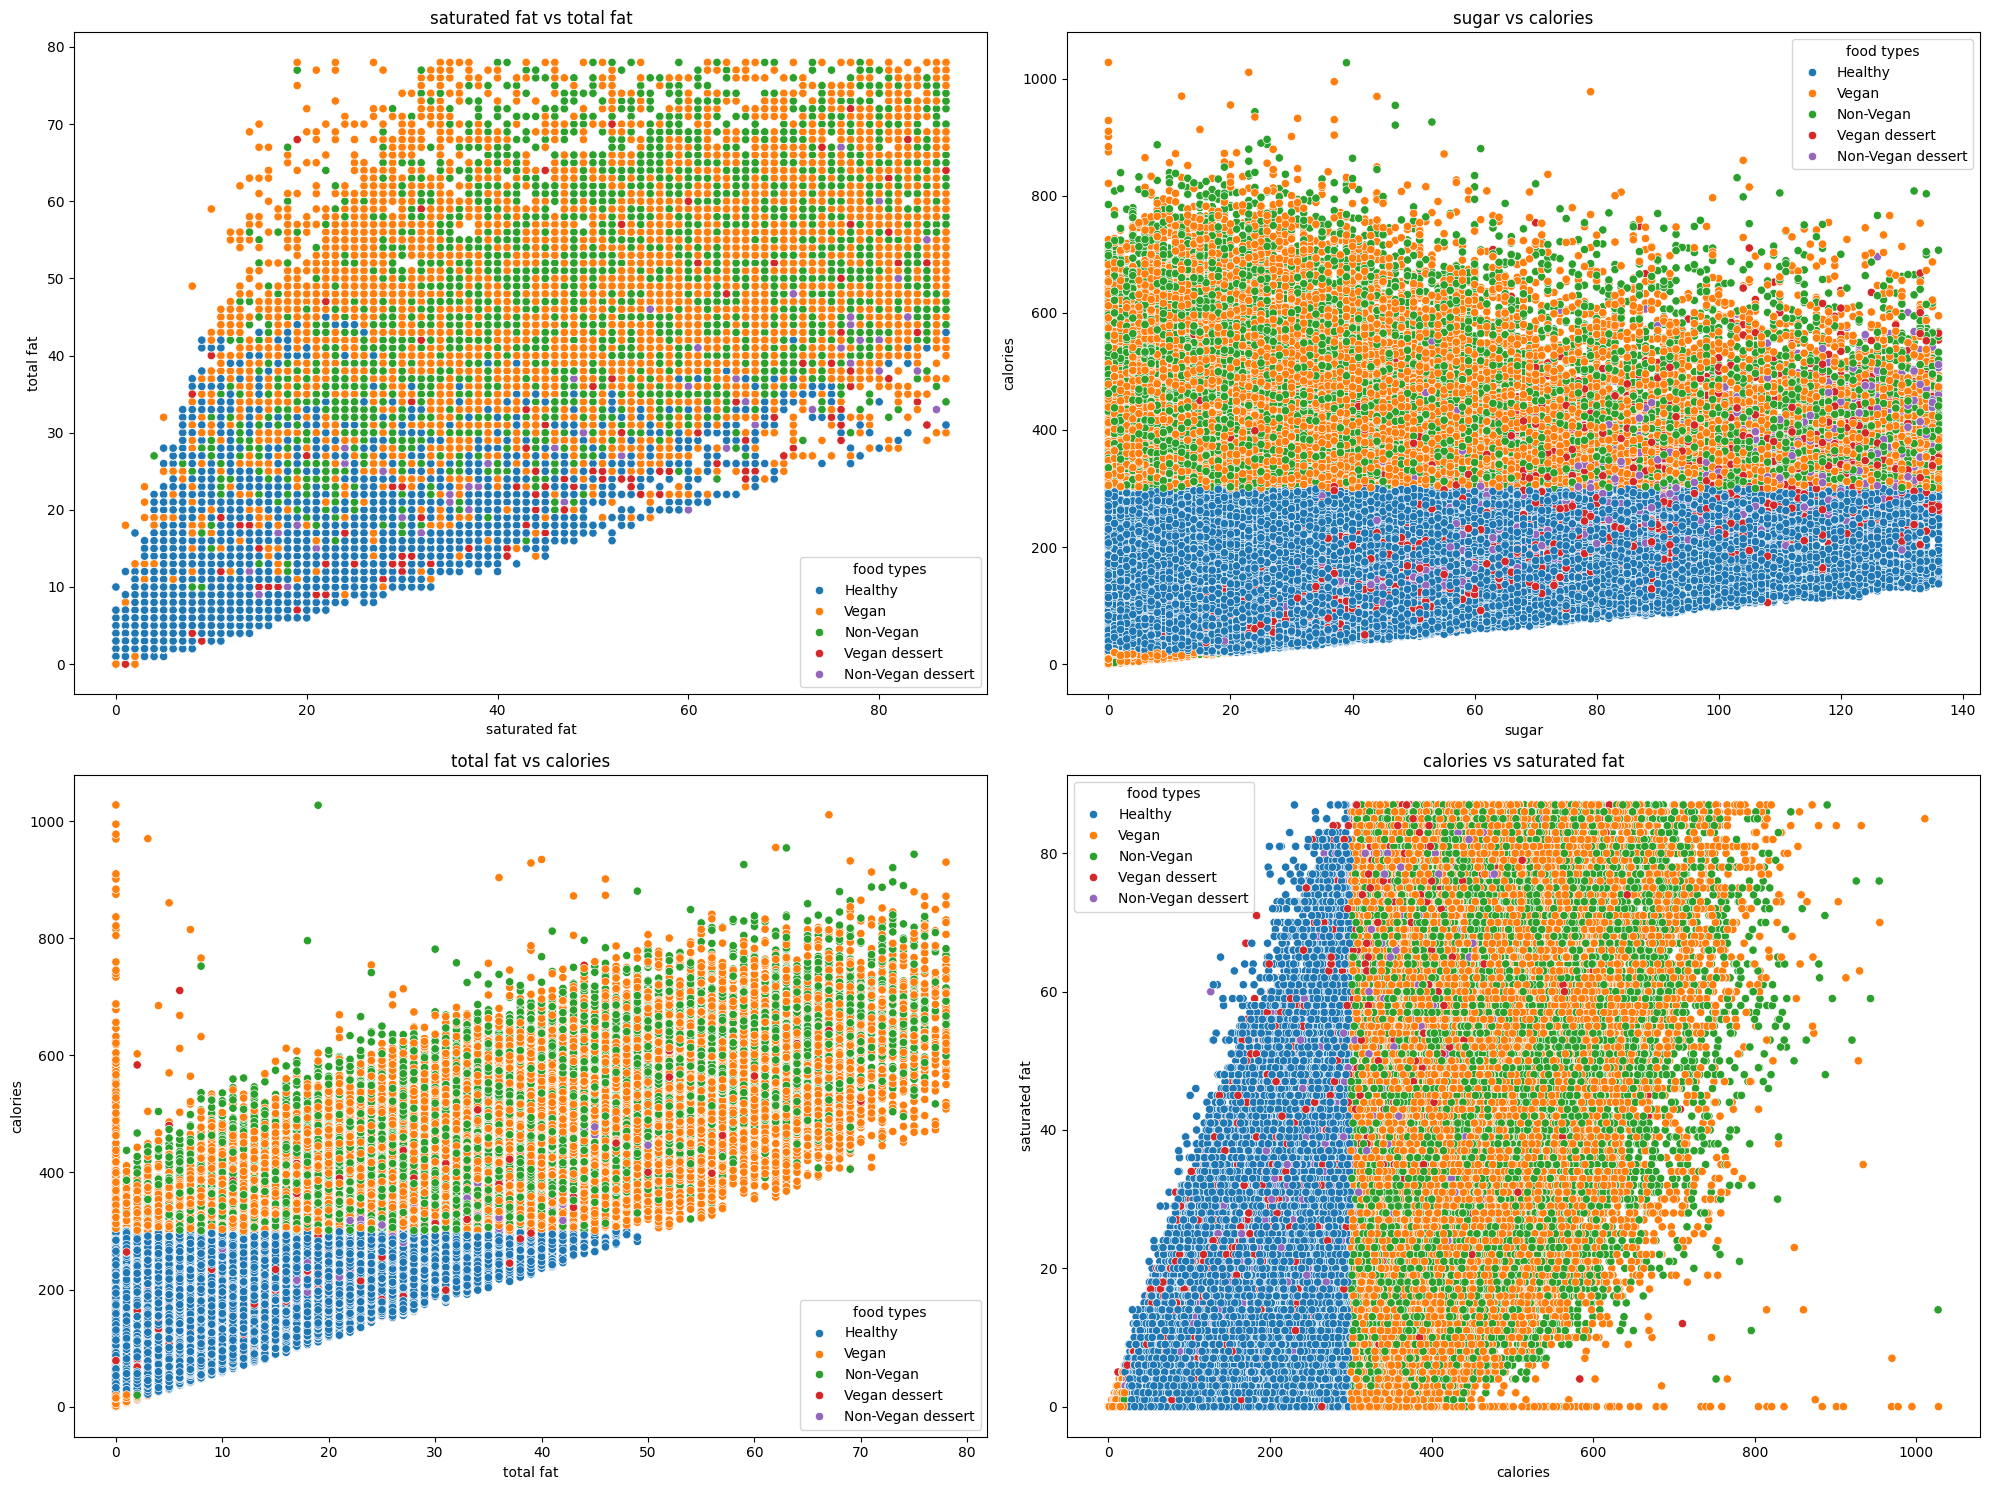

In [37]:
fig, ax = plt.subplots(2, 2, figsize=(20, 15))

scatterplot('saturated fat', 'total fat', ax[0, 0])
scatterplot('sugar', 'calories', ax[0, 1])
scatterplot('total fat', 'calories', ax[1, 0])
scatterplot('calories', 'saturated fat', ax[1, 1])

plt.tight_layout()
plt.show()

Insights:
1. As indicated above, saturated fat and total fat exhibits the strongest linear relationship compare to other features.
2. Food types classified as healthy have lower fat and calories content compared to other food types.

Next, we will drop one more column `food types` since we have one hot encode this column and the sole purpose of not dropping it before this is because we would like to utilize it as the legend in our data visualization.

In [38]:
df.drop(['food types'], axis=1, inplace=True)
# save to a new csv file for streamlit application used later
df.to_csv('./data/filtered_data.csv')

## 6.0 Modeling

We'll employ the K-Nearest Neighbors algorithm to identify the closest data points relative to the user's preferences. This method calculates the proximity of each data point to the user's input based on certain features. K-Nearest Neighbors is particularly suitable for this task because it operates on the principle of similarity, making it effective for recommendation systems where finding similar items or preferences is crucial.

### 6.1 Feature Scaling

Before employing any algorithm, we'll first conduct feature scaling. Since most of our columns for the food type categories such as `calories` exhibit a Gaussian(Normal) distribution, standardization would be a suitable technique to handle feature scaling in this case. We will utilize Scikit Learn `StandardScaler()` to standardize the numerical values, making it simpler to input into our model later on.

In [39]:
scaler=StandardScaler()
prep_data=scaler.fit_transform(df.iloc[:, 7:18].to_numpy())

Next, we will define Nearest Neighbors algorithm with cosine metric and fit into our model.

In [40]:
# define nearest neighbors with cosine metric
neigh = NearestNeighbors(metric='cosine',algorithm='brute')
neigh.fit(prep_data)

NearestNeighbors(algorithm='brute', metric='cosine')

We will construct a pipeline object by utilising FunctionTransformer to apply feature scaling followed by K-Nearest Neighbors.

In [41]:
transformer = FunctionTransformer(neigh.kneighbors,kw_args={'return_distance':False})
# creating a pipeline to apply feature scaling followed by K-Nearest Neighbors
pipeline=Pipeline([('std_scaler',scaler),('NN',transformer)])

In [42]:
params={'n_neighbors':10,'return_distance':False}
pipeline.get_params()
pipeline.set_params(NN__kw_args=params)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('NN',
                 FunctionTransformer(func=<bound method KNeighborsMixin.kneighbors of NearestNeighbors(algorithm='brute', metric='cosine')>,
                                     kw_args={'n_neighbors': 10,
                                              'return_distance': False}))])

Next, we will try to apply the model pipeline on our first row of the dataset.

In [43]:
pipeline.transform(df.iloc[0:1,7:18].to_numpy())[0]

array([     0,  83700, 120481, 123515, 142377,  71076,  53940,  16869,
       113391, 110572])

In [44]:
df.head()

,name,minutes,tags,n_steps,steps,ingredients,n_ingredients,calories,total fat,sugar,sodium,protein,saturated fat,carbohydrates,Healthy,Non-Vegan,Non-Vegan dessert,Vegan,Vegan dessert
0,arriba baked winter squash mexican style,55,"['60-minutes-or-less', 'time-to-make', 'course...",11,"['make a choice and proceed with recipe', 'dep...","['winter squash', 'mexican seasoning', 'mixed ...",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0,True,False,False,False,False
1,a bit different breakfast pizza,30,"['30-minutes-or-less', 'time-to-make', 'course...",9,"['preheat oven to 425 degrees f', 'press dough...","['prepared pizza crust', 'sausage patty', 'egg...",6,173.4,18.0,0.0,17.0,22.0,35.0,1.0,True,False,False,False,False
2,all in the kitchen chili,130,"['time-to-make', 'course', 'preparation', 'mai...",6,"['brown ground beef in large pot', 'add choppe...","['ground beef', 'yellow onions', 'diced tomato...",13,269.8,22.0,32.0,48.0,39.0,27.0,5.0,True,False,False,False,False
3,alouette potatoes,45,"['60-minutes-or-less', 'time-to-make', 'course...",11,['place potatoes in a large pot of lightly sal...,"['spreadable cheese with garlic and herbs', 'n...",11,368.1,17.0,10.0,2.0,14.0,8.0,20.0,False,False,False,True,False
5,apple a day milk shake,0,"['15-minutes-or-less', 'time-to-make', 'course...",4,"['combine ingredients in blender', 'cover and ...","['milk', 'vanilla ice cream', 'frozen apple ju...",4,160.2,10.0,55.0,3.0,9.0,20.0,7.0,True,False,False,False,False


### 6.2 Model Pipeline

We will transform the steps outlined above into a series of functions, enabling us to apply the model pipeline to our input more efficiently.

In [45]:
# perform feature scaling
def scaling(df):
    scaler=StandardScaler()
    prep_data=scaler.fit_transform(df.iloc[:,7:14].to_numpy())
    return prep_data,scaler

# utilizes the K-nearest neighbors algorithm to identify the nearest neighbors
def nn_predictor(prep_data):
    neigh = NearestNeighbors(metric='cosine',algorithm='brute')
    neigh.fit(prep_data)
    return neigh

# construct a pipeline model
def build_pipeline(neigh,scaler,params):
    transformer = FunctionTransformer(neigh.kneighbors,kw_args=params)
    pipeline=Pipeline([('std_scaler',scaler),('NN',transformer)])
    return pipeline

# filter data according to user requirements
def filter_data(df, ingredient_filter, max_nutrition, food_type):
    extract_data=df.copy()
    for column,maximum in zip(extract_data.columns[7:13],max_nutrition):
        extract_data = extract_data[extract_data[column]<maximum]
    if food_type != None:
        extract_data = extract_data[extract_data[food_type]==True]
    if ingredient_filter!=None:
        for ingredient in ingredient_filter:
            extract_data = extract_data[extract_data['ingredients'].str.contains(ingredient,regex=False)]
    return extract_data

# apply pipeline model on input data
def apply_pipeline(pipeline,_input,extract_data):
    _input = np.array(_input).reshape(1, -1)
    return extract_data.iloc[pipeline.transform(_input)[0]]

Next, we will integrate the functions defined above into a cohesive recommendation system pipeline.

In [46]:
# recommend user based on their input requirements
def recommend(df, max_nutritional_values, food_type, ingredient_filter=[], params={'return_distance':False}):
    extract_data=filter_data(df, ingredient_filter, max_nutritional_values, food_type)
    prep_data,scaler=scaling(extract_data)
    neigh=nn_predictor(prep_data)
    pipeline=build_pipeline(neigh, scaler,params)
    return apply_pipeline(pipeline, max_nutritional_values, extract_data)

## 7.0 Model Testing

Now its time to test our recommendation engine that we built. We will attempt to define some values based on our requirements and feed the input into our model. For instance, we could have the user input a maximum calories of 2000, so we will define it as `max_calories=2000`.

In [47]:
max_calories=50
max_daily_fat=50
max_daily_Sugar=40
max_daily_Sodium=2300
max_daily_Protein=200
max_daily_Saturatedfat=13
max_daily_Carbohydrate=325
food_type='Non-Vegan'
ingredients=['eggs']
inputs = [max_calories, max_daily_fat, max_daily_Sugar, max_daily_Sodium, max_daily_Protein, max_daily_Saturatedfat, max_daily_Carbohydrate]

Now that we have define the inputs, we could feed it into our model pipeline and give it a test on our recommendation system that we built.

In [48]:
recommend(df, inputs, food_type, ingredients)

,name,minutes,tags,n_steps,steps,ingredients,n_ingredients,calories,total fat,sugar,sodium,protein,saturated fat,carbohydrates,Healthy,Non-Vegan,Non-Vegan dessert,Vegan,Vegan dessert
14977,baked ravioli bites,23,"['30-minutes-or-less', 'time-to-make', 'course...",8,"['preheat broiler', 'grease baking sheet', 'di...","['cheese ravioli', 'eggs', 'italian seasoned b...",5,13.5,0.0,0.0,2.0,1.0,0.0,0.0,False,True,False,False,False
131697,maryland mini crab shells,35,"['60-minutes-or-less', 'time-to-make', 'course...",7,"['in a small bowl , combine mayonnaise , egg ,...","['mayonnaise', 'eggs', 'lemon juice', 'old bay...",10,18.4,1.0,0.0,2.0,5.0,0.0,0.0,False,True,False,False,False
64952,crispy passover cookies gluten free,25,"['lactose', '30-minutes-or-less', 'time-to-mak...",6,"['beat eggs eggs , salt , and vanilla', 'add s...","['eggs', 'salt', 'vanilla sugar', 'sugar', 'gr...",6,19.2,0.0,16.0,1.0,0.0,0.0,1.0,False,True,False,False,False
219794,uncle bill s cottage cheese perogie filling,15,"['15-minutes-or-less', 'time-to-make', 'course...",6,['squeeze as much liquid that you can from the...,"['dry curd cottage cheese', 'green onion', 'eg...",5,18.3,0.0,1.0,1.0,5.0,0.0,0.0,False,True,False,False,False
50818,chocolate lady fingers,25,"['30-minutes-or-less', 'time-to-make', 'course...",14,"['preheat oven to 375', 'using an electric mix...","['eggs', 'salt', 'cream of tartar', 'sugar', '...",7,16.7,0.0,8.0,0.0,0.0,0.0,1.0,False,True,False,False,False


From the output displayed above, we could observe that our model recommending us five food items based on our input given.